<a href="https://colab.research.google.com/github/Rajeshwarinm26/House-price-prediction--Chennai/blob/main/Chennai_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required Libraries.

In [ ]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Reading the file

In [ ]:
df = pd.read_csv('train-chennai-sale.csv')
pd.set_option('display.max_columns',None)
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
def rename_cols(dataframe):
  cols = [var.lower() for var in dataframe.columns]
  dataframe.columns = cols
  return dataframe

In [ ]:
df = rename_cols(df)

In [ ]:
df.head()

,prt_id,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
df.shape

(7109, 22)

In [ ]:
df.drop(columns = ['prt_id','reg_fee','commis'],inplace=True)

In [ ]:
df.shape

(7109, 19)

In [ ]:
df.shape

(7109, 19)

# Data Cleaning

In [ ]:
# checking for null values
pd.DataFrame(df.isnull().sum()).T

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price
0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,48,0


In [ ]:
df = df.fillna({'n_bedroom': st.mode(df['n_bedroom']),
                'n_bathroom': df['n_bathroom'].median(),
                'qs_overall': round(df['qs_overall'].mean(),3)})

In [ ]:
pd.DataFrame(df.isnull().sum()).T

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['n_bedroom'] = df['n_bedroom'].astype(int)
df['n_bathroom'] = df['n_bathroom'].astype(int)

df['date_sale'] = pd.to_datetime(df['date_sale'])
df['date_build'] = pd.to_datetime(df['date_build'])

In [ ]:
#checking for correct format
pd.DataFrame(df.dtypes).T

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price
0,object,int64,datetime64[ns],int64,int64,int64,int64,object,object,datetime64[ns],object,object,object,object,float64,float64,float64,float64,int64


In [ ]:
# creating new column
df['house_age'] = df['date_sale'] - df['date_build']

In [ ]:
def days_to_year(data):
    no_of_days = data.days
    no_of_years = round(no_of_days/365)
    return no_of_years

In [ ]:
df['house_age'] = df['house_age'].apply(days_to_year)

In [ ]:
df.rename(columns = {'house_age':'house_age(in years)'},inplace=True)

In [ ]:
df.drop(columns = ['date_sale','date_build'],inplace=True)

In [ ]:
df.head()

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price,house_age(in years)
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [ ]:
df.shape

(7109, 18)

In [ ]:
pd.DataFrame(df.dtypes.value_counts()).T

,object,int64,float64
0,7,7,4


In [ ]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['int_sqft',
 'dist_mainroad',
 'n_bedroom',
 'n_bathroom',
 'n_room',
 'sales_price',
 'house_age(in years)']

In [ ]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall']

In [ ]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['area',
 'sale_cond',
 'park_facil',
 'buildtype',
 'utility_avail',
 'street',
 'mzzone']

In [ ]:
for i in object_data_cols:
  print(f'Column "{i}" is divided into "{len(df[i].value_counts())}" categories.')

Column "area" is divided into "17" categories.
Column "sale_cond" is divided into "9" categories.
Column "park_facil" is divided into "3" categories.
Column "buildtype" is divided into "5" categories.
Column "utility_avail" is divided into "5" categories.
Column "street" is divided into "5" categories.
Column "mzzone" is divided into "6" categories.


# cleaning each column

In [ ]:
df['area'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: area, dtype: int64

In [ ]:
df['area'] = df['area'].replace({'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','TNagar':'T Nagar','Karapakam':'Karapakkam','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Velchery':'Velachery','Adyr':'Adyar','KKNagar':'KK Nagar'})
df['area'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: area, dtype: int64

In [ ]:
df['sale_cond'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: sale_cond, dtype: int64

In [ ]:
df['sale_cond'] = df['sale_cond'].replace({'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'})
df['sale_cond'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: sale_cond, dtype: int64

In [ ]:

df['park_facil'].value_counts()


Yes    3587
No     3520
Noo       2
Name: park_facil, dtype: int64

In [ ]:
df['park_facil'] = df['park_facil'].replace({'Noo':'No'})
df['park_facil'].value_counts()


Yes    3587
No     3522
Name: park_facil, dtype: int64

In [ ]:
df['buildtype'].value_counts()


House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: buildtype, dtype: int64

In [ ]:
df['buildtype'] = df['buildtype'].replace({'Comercial':'Commercial','Other':'Others'})
df['buildtype'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: buildtype, dtype: int64

In [ ]:
df['utility_avail'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: utility_avail, dtype: int64

In [ ]:
df['utility_avail'] = df['utility_avail'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewer','AllPub'])
df['utility_avail'].value_counts()


No Sewer    3700
AllPub      1887
ELO         1522
Name: utility_avail, dtype: int64

In [ ]:
df['street'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: street, dtype: int64

In [ ]:
df['street'] = df['street'].replace({'Pavd':'Paved','NoAccess':'No Access'})
df['street'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: street, dtype: int64

In [ ]:

df['mzzone'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: mzzone, dtype: int64

In [ ]:
for i in object_data_cols:
  print(f'Column "{i}" is divided into "{len(df[i].value_counts())}" categories.')

Column "area" is divided into "7" categories.
Column "sale_cond" is divided into "5" categories.
Column "park_facil" is divided into "2" categories.
Column "buildtype" is divided into "3" categories.
Column "utility_avail" is divided into "3" categories.
Column "street" is divided into "3" categories.
Column "mzzone" is divided into "6" categories.


# EDA

# Data Visualization and Interpretation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sales of houses according to Area')

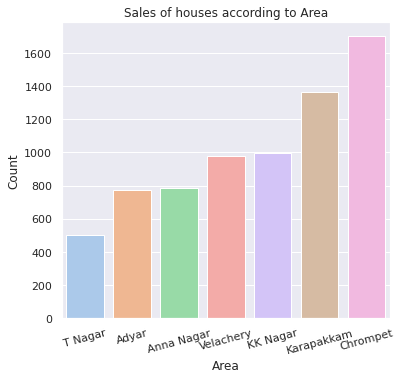

In [ ]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(df['area'],order=df['area'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Sales of houses according to Area')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sales of houses according to Sale Conditions')

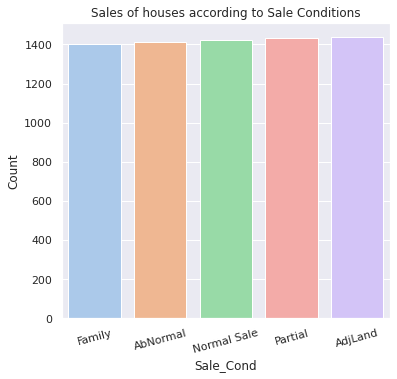

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(432)
sns.countplot(df['sale_cond'],order=df['sale_cond'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Sale_Cond')
plt.ylabel('Count')
plt.title('Sales of houses according to Sale Conditions')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sale of houses according to Parking Facility')

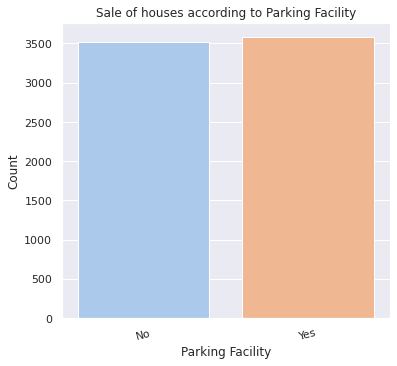

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(433)
sns.countplot(df['park_facil'],order=df['park_facil'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Parking Facility')
plt.ylabel('Count')
plt.title('Sale of houses according to Parking Facility')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sales of houses according to Buildtype')

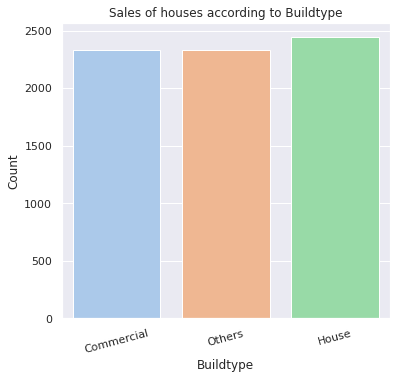

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(434)
sns.countplot(df['buildtype'],order=df['buildtype'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Buildtype')
plt.ylabel('Count')
plt.title('Sales of houses according to Buildtype')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sales of houses according to Utilities Available')

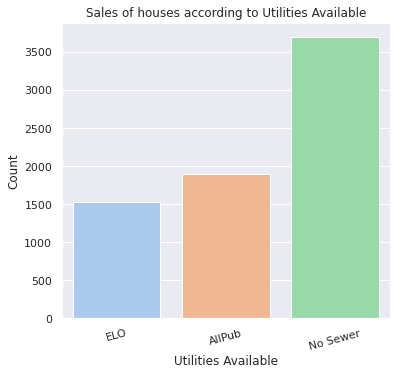

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(435)
sns.countplot(df['utility_avail'],order=df['utility_avail'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Utilities Available')
plt.ylabel('Count')
plt.title('Sales of houses according to Utilities Available')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sales of houses according to Street')

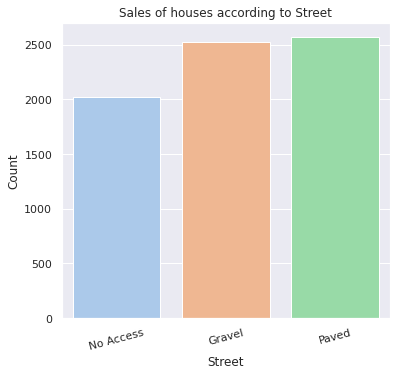

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(436)
sns.countplot(df['street'],order=df['street'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Street')
plt.ylabel('Count')
plt.title('Sales of houses according to Street')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sales of houses according to MZZONES')

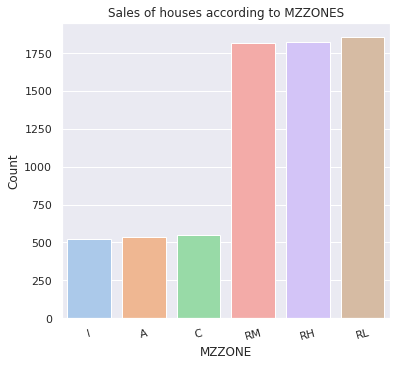

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(437)
sns.countplot(df['mzzone'],order=df['mzzone'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('MZZONE')
plt.ylabel('Count')
plt.title('Sales of houses according to MZZONES')

Interpretations :

 1.) According to the column "area" the highest number of houses sold were in the area "Chrompet".

 2.) According to the column "sale_cond", no such category has a strong influence on sales of house.

 3.) According to the column "park_facil", houses with parking facilities are slightly sold more.

 4.) According to the column "buildtype", houses used for living are sold more then using it as commercial or other spaces.

 5.) According to the column "utility_avail", houses with No Sewer are most sold.

 6.) According to the column "street", paved street and gravel street are more sold compared to houses with no access to street.
 
 7.) According to the column "mzzone", Zones such as RL, RH, RM are the zones where the most number of houses got sold.

In [ ]:
area_order = df.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')['area']
sale_cond_order = df.groupby('sale_cond')['sales_price'].mean().reset_index().sort_values('sales_price')['sale_cond']
park_facil_order = df.groupby('park_facil')['sales_price'].mean().reset_index().sort_values('sales_price')['park_facil']
buildtype_order = df.groupby('buildtype')['sales_price'].mean().reset_index().sort_values('sales_price')['buildtype']
utility_avail_order = df.groupby('utility_avail')['sales_price'].mean().reset_index().sort_values('sales_price')['utility_avail']
street_order = df.groupby('street')['sales_price'].mean().reset_index().sort_values('sales_price')['street']
mzzone_order = df.groupby('mzzone')['sales_price'].mean().reset_index().sort_values('sales_price')['mzzone']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Area vs Mean_Sales_Price')

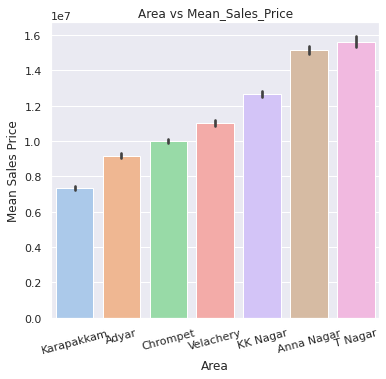

In [ ]:
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.barplot(df['area'],df['sales_price'],order=area_order)
plt.xticks(rotation=15)
plt.xlabel('Area')
plt.ylabel('Mean Sales Price')
plt.title('Area vs Mean_Sales_Price')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sale_Conditions vs Mean_Sales_Price')

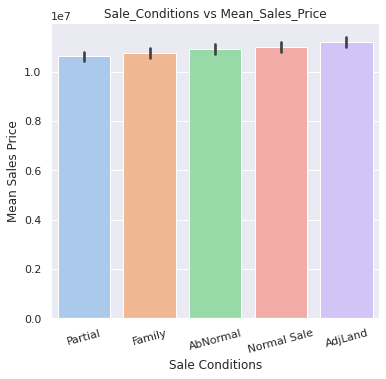

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(432)
sns.barplot(df['sale_cond'],df['sales_price'],order=sale_cond_order)
plt.xticks(rotation=15)
plt.xlabel('Sale Conditions')
plt.ylabel('Mean Sales Price')
plt.title('Sale_Conditions vs Mean_Sales_Price')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Parking Facility vs Mean_Sales_Price')

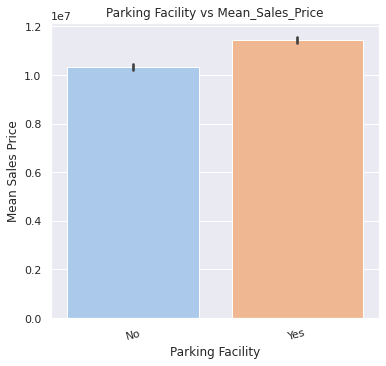

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(433)
sns.barplot(df['park_facil'],df['sales_price'],order=park_facil_order)
plt.xticks(rotation=15)
plt.xlabel('Parking Facility')
plt.ylabel('Mean Sales Price')
plt.title('Parking Facility vs Mean_Sales_Price')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'House Buildtype vs Mean_Sales_Price')

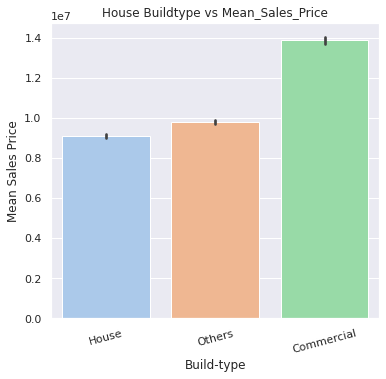

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(434)
sns.barplot(df['buildtype'],df['sales_price'],order=buildtype_order)
plt.xticks(rotation=15)
plt.xlabel('Build-type')
plt.ylabel('Mean Sales Price')
plt.title('House Buildtype vs Mean_Sales_Price')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Utilities Available vs Mean_Sales_Price')

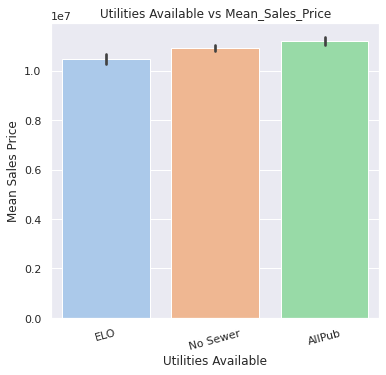

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(435)
sns.barplot(df['utility_avail'],df['sales_price'],order=utility_avail_order)
plt.xticks(rotation=15)
plt.xlabel('Utilities Available')
plt.ylabel('Mean Sales Price')
plt.title('Utilities Available vs Mean_Sales_Price')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Street vs Mean_Sales_Price')

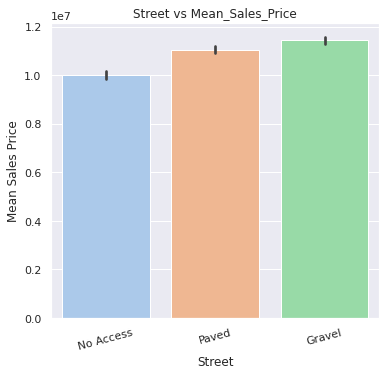

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(436)
sns.barplot(df['street'],df['sales_price'],order=street_order)
plt.xticks(rotation=15)
plt.xlabel('Street')
plt.ylabel('Mean Sales Price')
plt.title('Street vs Mean_Sales_Price')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'MZZONs vs Mean_Sales_Price')

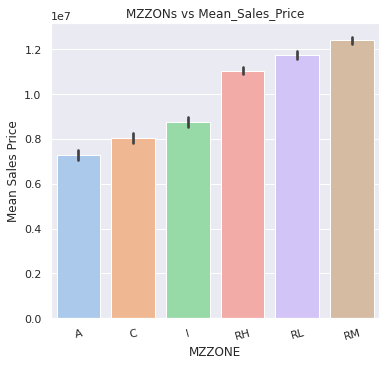

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(437)
sns.barplot(df['mzzone'],df['sales_price'],order=mzzone_order)
plt.xticks(rotation=15)
plt.xlabel('MZZONE')
plt.ylabel('Mean Sales Price')
plt.title('MZZONs vs Mean_Sales_Price')

Interpretations : 

From the above data visualization it can be understood that the categorical columns do have linear realtionship with the 
target variable ("sales_price").

So we have to use Ordinal Encoding to Encode all these categorical columns.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total Area in Sqft vs Sales_Price')

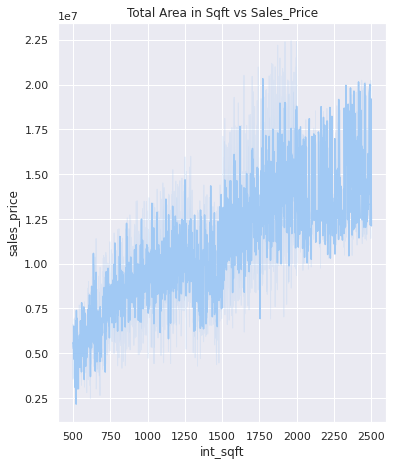

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(331)
sns.lineplot(df['int_sqft'],df['sales_price'])
plt.title('Total Area in Sqft vs Sales_Price')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distance from Mainroad vs Sales_Price')

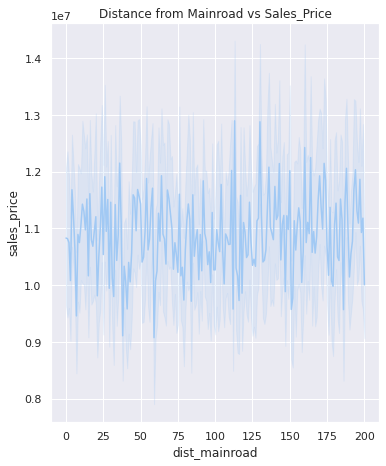

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(332)
sns.lineplot(df['dist_mainroad'],df['sales_price'])
plt.title('Distance from Mainroad vs Sales_Price')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Bedrooms vs Sales_Price')

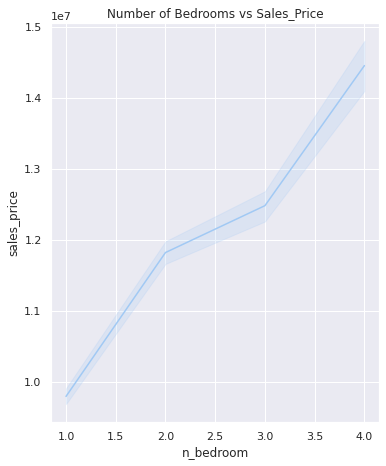

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(333)
sns.lineplot(df['n_bedroom'],df['sales_price'])
plt.title('Number of Bedrooms vs Sales_Price')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Bathrooms vs Sales_Price')

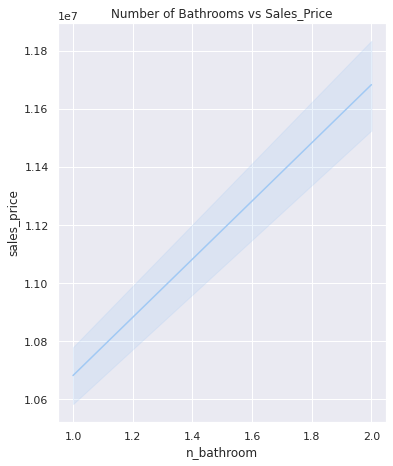

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(334)
sns.lineplot(df['n_bathroom'],df['sales_price'])
plt.title('Number of Bathrooms vs Sales_Price')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Rooms vs Sales_Price')

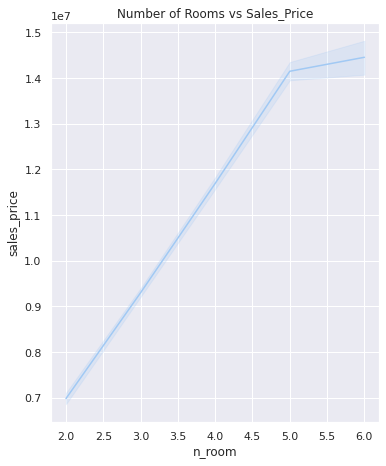

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(335)
sns.lineplot(df['n_room'],df['sales_price'])
plt.title('Number of Rooms vs Sales_Price')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'House Age vs Sales_Price')

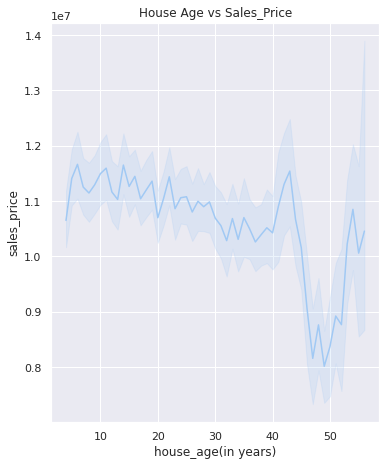

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(336)
sns.lineplot(df['house_age(in years)'],df['sales_price'])
plt.title('House Age vs Sales_Price')

Interpretations : 

For columns 'int_sqft','n_bedroom,'n_bathroom,'n_room' there is a clear Linear Relationship with the 'Sales_Price' column.

For column 'dist_mainroad' the distribution is uniform, no such linear relationship is discovered here.

For column 'house_age' we can see a hybrid kinda behaviour. For house ages 10 to 40 the sales_price drops a bit,
but from 40 to ~43 house prices rises and then again falls from ~43 - 50 and again it rises from 50-...

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Qs Rooms vs Sales Price')

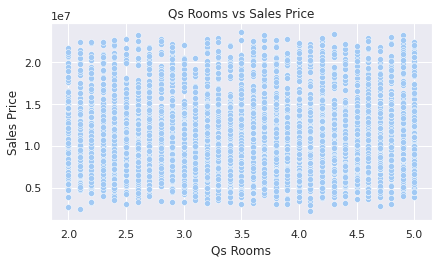

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(221)
sns.scatterplot(df['qs_rooms'],df['sales_price'])
plt.xlabel('Qs Rooms')
plt.ylabel('Sales Price')
plt.title('Qs Rooms vs Sales Price')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Qs Bedroom vs Sales Price')

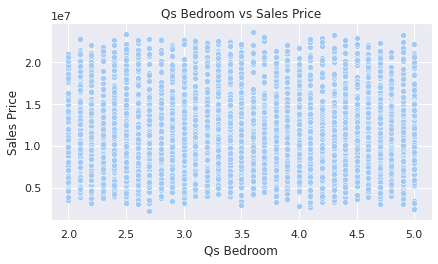

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(222)
sns.scatterplot(df['qs_bedroom'],df['sales_price'])
plt.xlabel('Qs Bedroom')
plt.ylabel('Sales Price')
plt.title('Qs Bedroom vs Sales Price')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Qs Bathroom vs Sales Price')

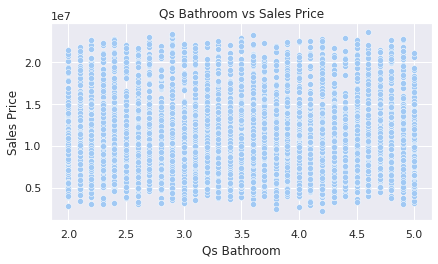

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(223)
sns.scatterplot(df['qs_bathroom'],df['sales_price'])
plt.xlabel('Qs Bathroom')
plt.ylabel('Sales Price')
plt.title('Qs Bathroom vs Sales Price')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Qs Overall vs Sales Price')

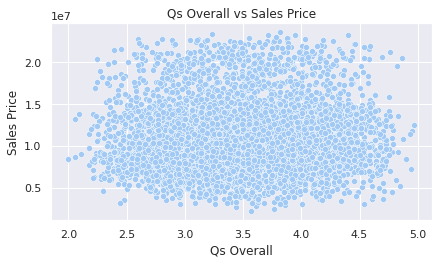

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(224)
sns.scatterplot(df['qs_overall'],df['sales_price'])
plt.xlabel('Qs Overall')
plt.ylabel('Sales Price')
plt.title('Qs Overall vs Sales Price')

Interpretations : 

From the above scatterplots we can clearly observe that none of the plots exihibits Linear Relationship with the 
Target Variable i.e Sales_Price.

# Encoding the data

In [ ]:
df['area'] = df['area'].map({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})
df['street'] = df['street'].map({'No Access':0,'Paved':1,'Gravel':2})
df['mzzone'] = df['mzzone'].map({'A':0,'C':1,'I':2,'RH':3,'RL':4,'RM':5})
df['park_facil'] = df['park_facil'].map({'No':0,'Yes':1})
df['buildtype'] = df['buildtype'].map({'House':0,'Others':1,'Commercial':2})
df['sale_cond'] = df['sale_cond'].map({'Partial':0,'Family':1,'AbNormal':2,'Normal Sale':3,'AdjLand':4})
df['utility_avail'] = df['utility_avail'].map({'ELO':0,'No Sewer':1,'AllPub':2})

In [ ]:
df.head()

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price,house_age(in years)
0,0,1004,131,1,1,3,2,1,2,2,1,0,4.0,3.9,4.9,4.330,7600000,44
1,5,1986,26,2,1,5,2,0,2,2,2,3,4.9,4.2,2.5,3.765,21717770,11
2,1,909,70,1,1,3,2,1,2,0,2,4,4.1,3.8,2.2,3.090,13159200,20
3,3,1855,14,3,2,5,1,0,1,1,1,2,4.7,3.9,3.6,4.010,9630290,22
4,0,1226,84,1,1,3,2,1,1,2,2,1,3.0,2.5,4.1,3.290,7406250,30


#Splitting the data

In [ ]:

def split(dataframe):
  X = dataframe.drop('sales_price',axis=1)
  y = dataframe['sales_price']
  return X,y

In [ ]:
X, y = split(df)

In [ ]:
X

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,house_age(in years)
0,0,1004,131,1,1,3,2,1,2,2,1,0,4.0,3.9,4.9,4.330,44
1,5,1986,26,2,1,5,2,0,2,2,2,3,4.9,4.2,2.5,3.765,11
2,1,909,70,1,1,3,2,1,2,0,2,4,4.1,3.8,2.2,3.090,20
3,3,1855,14,3,2,5,1,0,1,1,1,2,4.7,3.9,3.6,4.010,22
4,0,1226,84,1,1,3,2,1,1,2,2,1,3.0,2.5,4.1,3.290,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,51,1,1,2,4,0,1,0,0,5,3.0,2.2,2.4,2.520,49
7105,3,1897,52,3,2,5,1,1,1,1,0,3,3.6,4.5,3.3,3.920,9
7106,3,1614,152,2,1,4,3,0,0,1,2,2,4.3,4.2,2.9,3.840,29
7107,0,787,40,1,1,2,0,1,2,0,1,4,4.6,3.8,4.1,4.160,31


In [ ]:
y

0        7600000
1       21717770
2       13159200
3        9630290
4        7406250
          ...   
7104     5353000
7105    10818480
7106     8351410
7107     8507000
7108     9976480
Name: sales_price, Length: 7109, dtype: int64

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)



In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5687, 17) (1422, 17) (5687,) (1422,)


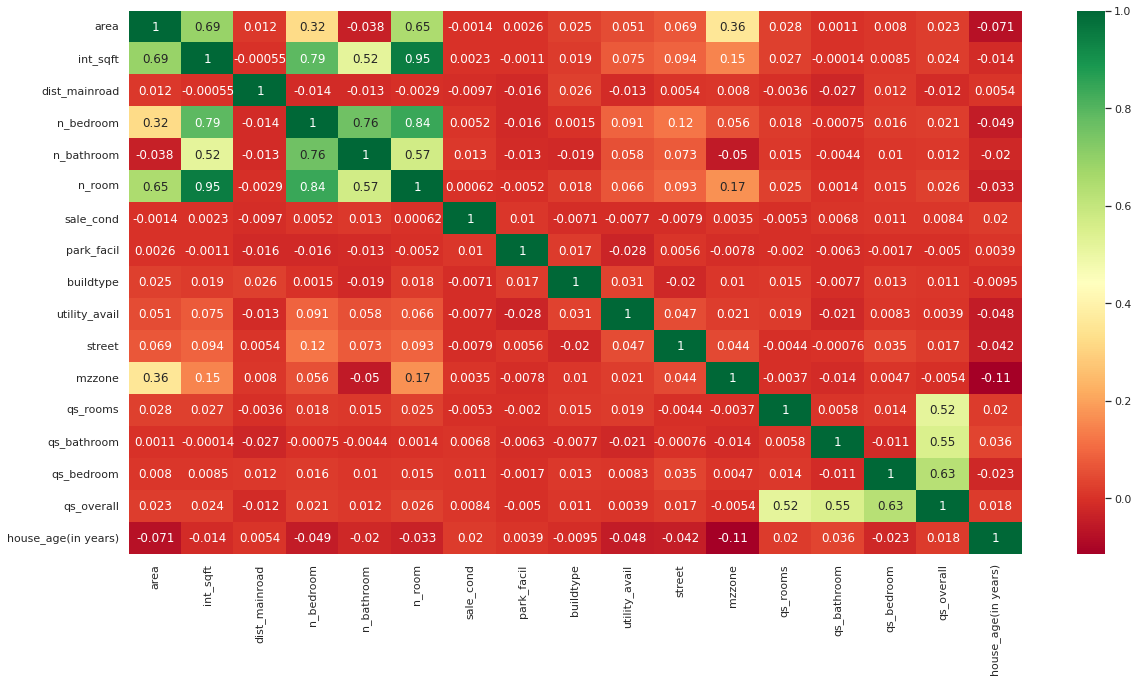

In [ ]:
plt.figure(figsize=(20,10))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix,annot=True,cmap='RdYlGn')

In [ ]:
def correlation(dataset,threshold):
  correlated_features = set()
  cor_matrix = dataset.corr()
  for i in range(len(cor_matrix.columns)):
    for j in range(i):
      if abs(cor_matrix.iloc[i,j]) > threshold:
        col_name = cor_matrix.columns[i]
        correlated_features.add(col_name)
  return correlated_features

In [ ]:
corr_cols = correlation(X_train,0.8)

In [ ]:
print(corr_cols)

{'n_room'}


Our correlation function says that the col "n_room" is highly correlated.
Upon research it comes out that the feature "n_room" has 0.95 correlation score with the column "int_sqft".
Therefore it is good to drop "n_room" from our data.

In [ ]:
new_X_train = X_train.drop(corr_cols,axis=1)
new_X_test = X_test.drop(corr_cols,axis=1)

In [ ]:
train = pd.concat([new_X_train,y_train],axis=1)
test = pd.concat([new_X_test,y_test],axis=1)

In [ ]:
train.shape, test.shape

((5687, 17), (1422, 17))

In [ ]:
new_df = pd.concat([train,test],axis=0)

In [ ]:
new_df.shape

(7109, 17)

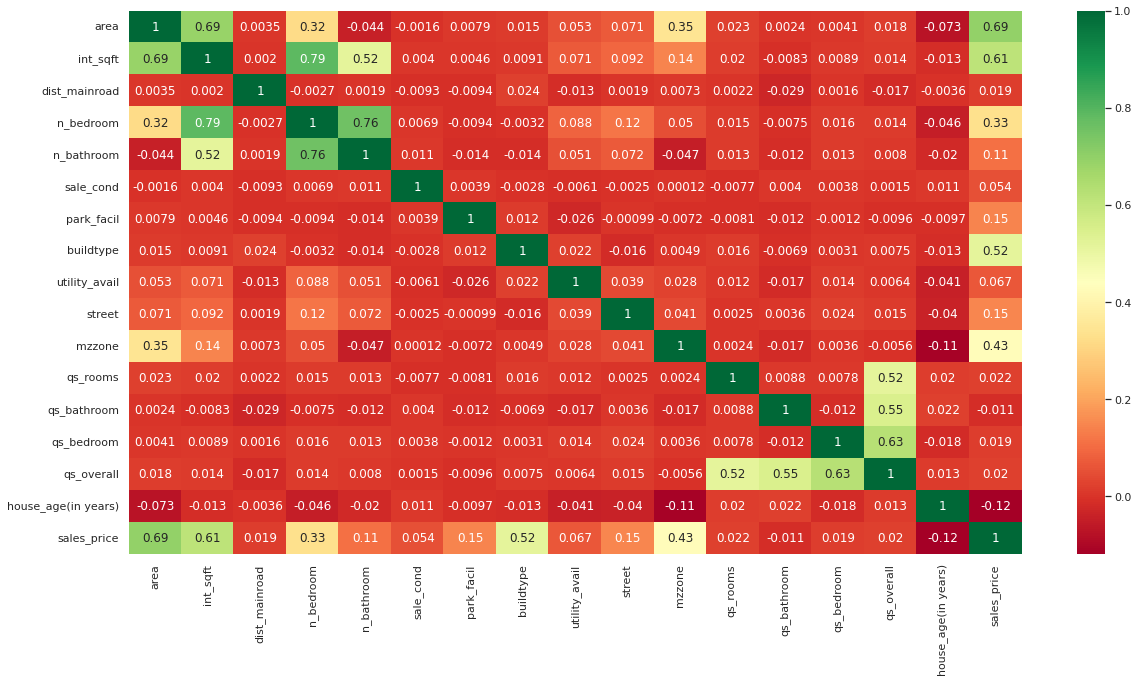

In [ ]:
new_corr_matrix = new_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(new_corr_matrix,annot=True,cmap='RdYlGn')

In [ ]:
target_corr = pd.DataFrame(new_df[new_df.columns[:]].corr()['sales_price'][:])
target_corr

,sales_price
area,0.694149
int_sqft,0.612125
dist_mainroad,0.018783
n_bedroom,0.330987
n_bathroom,0.108834
sale_cond,0.054370
park_facil,0.146428
buildtype,0.515717
utility_avail,0.067147
street,0.149589


In [ ]:
X,y = split(new_df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((5687, 16), (1422, 16))

# Developing Machine Learning Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression(fit_intercept=True) 
linear_model.fit(X_train,y_train)  
linear_model.predict(X_test)  

array([11730662.8018865 , 12810660.79190363, 12179436.81748084, ...,
       12453601.97204354,  7621353.00088862, 11218415.27555093])

In [ ]:
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.8647896232618393

# K Nearest Neighbors

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_values=np.arange(1,50)
cross_val_knn=[]
for k in knn_values:
  knn_regressor=KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(X_train_scaled,y_train)
  print("K value : ", k, " train score : ", knn_regressor.score(X_train_scaled,y_train)  ,"cross_val_score : ", cross_val_score(knn_regressor,X_train,y_train,cv = 10).mean())
  cross_val_knn.append(cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())

K value :  1  train score :  1.0 cross_val_score :  -0.09255417368509955
K value :  2  train score :  0.9135397239485834 cross_val_score :  0.16684429992969468
K value :  3  train score :  0.8958536023929304 cross_val_score :  0.260071549036313
K value :  4  train score :  0.8880139992041075 cross_val_score :  0.30295441942604256
K value :  5  train score :  0.8797302515137342 cross_val_score :  0.3322419169684608
K value :  6  train score :  0.8740200651325756 cross_val_score :  0.3542514498236315
K value :  7  train score :  0.8712204451269722 cross_val_score :  0.36241371639572745
K value :  8  train score :  0.868039817672255 cross_val_score :  0.3682912862954037
K value :  9  train score :  0.8646877645672015 cross_val_score :  0.37013590262528434
K value :  10  train score :  0.8609064712868107 cross_val_score :  0.3775247452851757
K value :  11  train score :  0.8591103549094827 cross_val_score :  0.3807437777630268
K value :  12  train score :  0.8563954621276699 cross_val_scor

In [ ]:
cross_val_knn_regressor=max(cross_val_knn)

In [ ]:
print("The best K-Value is 11 and Cross_val_score is",cross_val_knn_regressor )

The best K-Value is 11 and Cross_val_score is 0.826801840146212


In [ ]:
knn_regressor=KNeighborsRegressor(n_neighbors=11)
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=11)

In [ ]:
cross_val_knn_regressor=cross_val_score(knn_regressor,X_train,y_train,cv=15).mean()
cross_val_knn_regressor

0.3786419804825327

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

max_depth=np.arange(1,15)
cross_val_dt=[]
for d in max_depth:
  dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
  dt_regressor.fit(X_train,y_train)
  print("Depth : ", d, " train Score  : ", dt_regressor.score(X_train,y_train), "cross_val_score : ", cross_val_score(dt_regressor,X_train,y_train,cv = 15).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,X_train,y_train,cv = 15).mean())

Depth :  1  train Score  :  0.3631378962541517 cross_val_score :  0.3608294587878435
Depth :  2  train Score  :  0.6827348224405961 cross_val_score :  0.679778503319868
Depth :  3  train Score  :  0.8043386978453985 cross_val_score :  0.8022299159344264
Depth :  4  train Score  :  0.8878110855542122 cross_val_score :  0.8836995595309356
Depth :  5  train Score  :  0.9222494402675103 cross_val_score :  0.9157814916642372
Depth :  6  train Score  :  0.9434796683725204 cross_val_score :  0.9354483219842843
Depth :  7  train Score  :  0.9592998661668387 cross_val_score :  0.949172343874394
Depth :  8  train Score  :  0.9726003193951881 cross_val_score :  0.9592959998572357
Depth :  9  train Score  :  0.9824801742822692 cross_val_score :  0.9648031686930462
Depth :  10  train Score  :  0.9897790825194515 cross_val_score :  0.9665516116320121
Depth :  11  train Score  :  0.9944882992630785 cross_val_score :  0.9666461321587191
Depth :  12  train Score  :  0.9972972274264097 cross_val_score :

In [ ]:
cross_val_dt_regressor=max(cross_val_dt)

In [ ]:
print("The best depth is 11 and Cross_val_score is:",cross_val_dt_regressor)

The best depth is 11 and Cross_val_score is: 0.9666461321587191


In [ ]:
dt_regressor=DecisionTreeRegressor(max_depth=3, random_state=0)
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [ ]:
cross_val_dt_regressor=cross_val_score(dt_regressor,X_train,y_train,cv=15).mean()
cross_val_dt_regressor

0.8022299159344264

In [ ]:
ftImp = list(zip(dt_regressor.feature_importances_, new_df.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
0,0.602659,area
7,0.397341,buildtype
1,0.000000,int_sqft
2,0.000000,dist_mainroad
3,0.000000,n_bedroom
4,0.000000,n_bathroom
5,0.000000,sale_cond
6,0.000000,park_facil
8,0.000000,utility_avail
9,0.000000,street


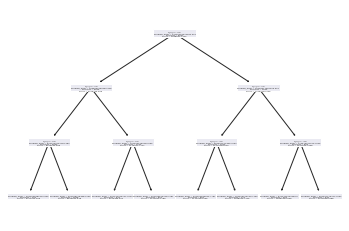

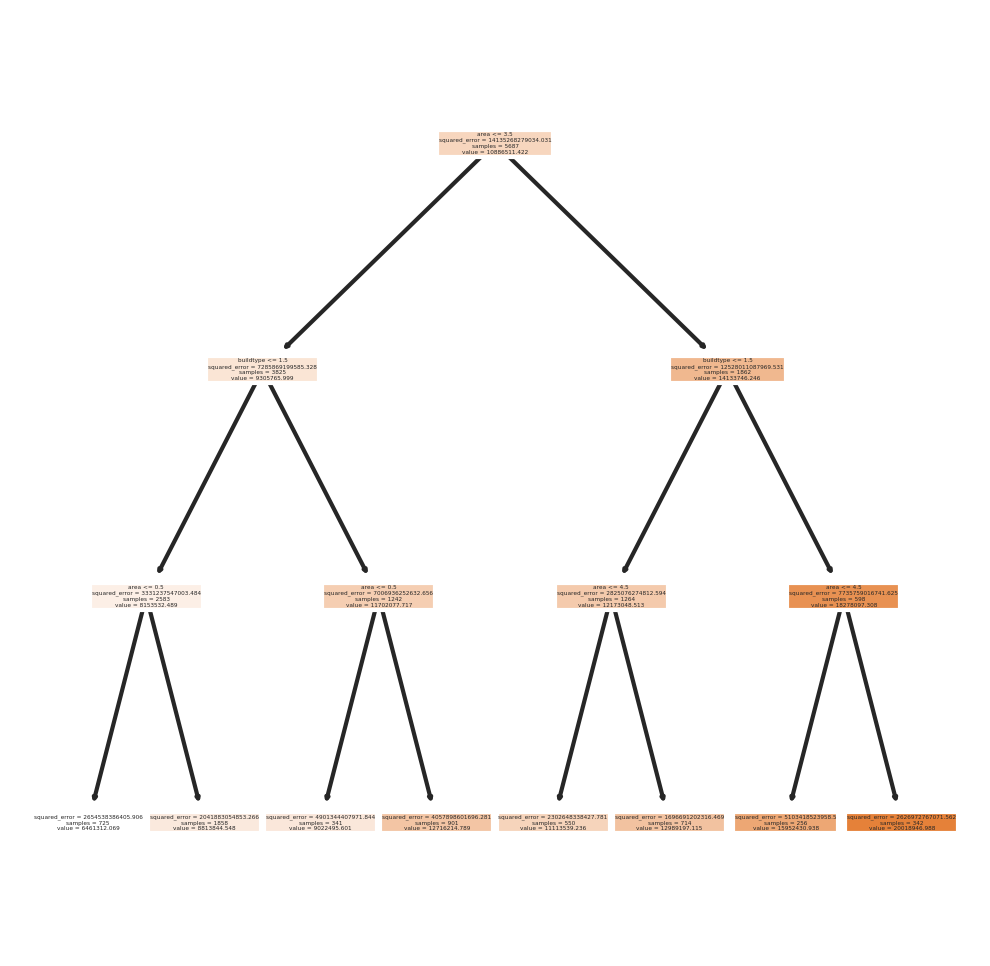

In [ ]:
from sklearn import tree
tree.plot_tree(dt_regressor) 

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt_regressor,
               feature_names = new_df.columns[:-1],
               filled = True);
fig.savefig('imagename.png')

# Random Forest

In [ ]:
max_depth=np.arange(1,20)
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())

Depth :  1 cross_val_score :  0.3608845214034746
Depth :  2 cross_val_score :  0.6797930038115769
Depth :  3 cross_val_score :  0.8086891184805491
Depth :  4 cross_val_score :  0.8923762144780396
Depth :  5 cross_val_score :  0.927644604718208
Depth :  6 cross_val_score :  0.9503089109602627
Depth :  7 cross_val_score :  0.965078821807243
Depth :  8 cross_val_score :  0.9743372437428336
Depth :  9 cross_val_score :  0.9796396137703933
Depth :  10 cross_val_score :  0.9823558483656456
Depth :  11 cross_val_score :  0.9837423522865817
Depth :  12 cross_val_score :  0.9843646058947921
Depth :  13 cross_val_score :  0.9846088948389856
Depth :  14 cross_val_score :  0.9846866577445835
Depth :  15 cross_val_score :  0.9847029879744826
Depth :  16 cross_val_score :  0.984666469177202
Depth :  17 cross_val_score :  0.984699454770518
Depth :  18 cross_val_score :  0.9847185686051694
Depth :  19 cross_val_score :  0.9847160589318665


In [ ]:
cross_val_rf_regressor=max(cross_val_rf)

In [ ]:
print("The best depth is 17 and Cross_val_score is:",cross_val_rf_regressor)

The best depth is 17 and Cross_val_score is: 0.9847185686051694


In [ ]:
rf_regressor=RandomForestRegressor(max_depth=18, random_state=0)
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=18, random_state=0)

In [ ]:
cross_val_rf_regressor=cross_val_score(rf_regressor,X_train,y_train,cv=15).mean()
cross_val_rf_regressor

0.9847185686051694

# Gradient Boosting

In [ ]:
cross_val_gb=[]
for lr in [0.01,0.05,0.1,0.2,0.3,0.35,0.4,0.5,0.8,1]:
  gb_regressor= GradientBoostingRegressor(learning_rate=lr)
  gb_regressor.fit(X_train, y_train)
  print("Learning rate : ", lr, "cross_val_score : ", cross_val_score(gb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_gb.append(cross_val_score(gb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score :  0.7368480012972967
Learning rate :  0.05 cross_val_score :  0.9715873388421683
Learning rate :  0.1 cross_val_score :  0.9903856803737737
Learning rate :  0.2 cross_val_score :  0.9955967472594109
Learning rate :  0.3 cross_val_score :  0.9954478431290334
Learning rate :  0.35 cross_val_score :  0.9953494373527417
Learning rate :  0.4 cross_val_score :  0.9955874617274659
Learning rate :  0.5 cross_val_score :  0.9960692262528447
Learning rate :  0.8 cross_val_score :  0.9957407916142931
Learning rate :  1 cross_val_score :  0.9954190328667364


In [ ]:
cross_val_gb_regressor=max(cross_val_gb)

In [ ]:
print("The best learning rate is 0.3 and cross_val_score is:",cross_val_gb_regressor)

The best learning rate is 0.3 and cross_val_score is: 0.9960731473414107


In [ ]:
gb_regressor=GradientBoostingRegressor(learning_rate=0.35)
gb_regressor.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.35)

In [ ]:
cross_val_gb_regressor=cross_val_score(gb_regressor,X_train,y_train,cv=15).mean()
cross_val_gb_regressor

0.9953499676201384

# Extreme Gradient Boosting

In [ ]:
cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.09,0.1,0.11,0.12,0.13,0.15,0.18,0.2,0.25,0.3]:
  xgb_regressor=xgb.XGBRegressor(colsample_bytree=0.4,learning_rate = lr,n_estimators=1000)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv=15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv=15).mean())


[07:35:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:35:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:35:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:35:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:35:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:35:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:35:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:35:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
cross_val_xgb_regressor=max(cross_val_xgb)

In [ ]:
print("The best learning rate is 0.09 and cross_val_score is",cross_val_xgb_regressor)

The best learning rate is 0.09 and cross_val_score is 0.9987675225633728


In [ ]:
xgb_regressor=xgb.XGBRegressor(colsample_bytree=0.4,learning_rate=0.12,n_estimators=1000)
xgb_regressor.fit(X_train,y_train)

[07:54:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.4, learning_rate=0.12, n_estimators=1000)

In [ ]:
cross_val_xgb_regressor=cross_val_score(xgb_regressor,X_train,y_train,cv=15).mean()
cross_val_xgb_regressor

[07:56:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:56:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:56:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:56:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:56:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:56:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:56:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:56:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

0.9987077454136214

In [ ]:
print("Cross Validation Score for Linear Regression Model:",cross_val_linear_model)
print("Cross Validation Score for K Nearest Neighbors Regression Model:",cross_val_knn_regressor)
print("Cross Validation Score for Decision Tree Regression Model:",cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model:",cross_val_rf_regressor)
print("Cross Validation Score for Gradient Boosting Regression Model:",cross_val_gb_regressor)
print("Cross Validation Score for Extreme Gradient Regression Model:",cross_val_xgb_regressor)

Cross Validation Score for Linear Regression Model: 0.8647896232618393
Cross Validation Score for K Nearest Neighbors Regression Model: 0.3786419804825327
Cross Validation Score for Decision Tree Regression Model: 0.8022299159344264
Cross Validation Score for Random Forest Regression Model: 0.9847185686051694
Cross Validation Score for Gradient Boosting Regression Model: 0.9953499676201384
Cross Validation Score for Extreme Gradient Regression Model: 0.9987077454136214


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_pred_lr=linear_model.predict(X_test)
y_pred_knn=knn_regressor.predict(X_test)
y_pred_dt=dt_regressor.predict(X_test)
y_pred_rf=rf_regressor.predict(X_test)
y_pred_gb=gb_regressor.predict(X_test)
y_pred_xgb=xgb_regressor.predict(X_test)

In [ ]:
R2_score_lr=r2_score(y_test,y_pred_lr)
R2_score_knn=r2_score(y_test,y_pred_knn)
R2_score_dt=r2_score(y_test,y_pred_dt)
R2_score_rf=r2_score(y_test,y_pred_rf)
R2_score_gb=r2_score(y_test,y_pred_gb)
R2_score_xgb=r2_score(y_test,y_pred_xgb)

In [ ]:
print("R2_Score for Linear Regression Model is ",R2_score_lr)
print("R2_Score for K Nearest Neighbors Regression Model is ",R2_score_knn)
print("R2_Score for Decision Tree Regression Model is ",R2_score_dt)
print("R2_Score for Random Forest Regression Model is ",R2_score_rf)
print("R2_Score for Gradient Boosting Regression Model is ",R2_score_gb)
print("R2_Score for Extreme Gradient Boosting Regression Model is ",R2_score_xgb)

R2_Score for Linear Regression Model is  0.8712824228301796
R2_Score for K Nearest Neighbors Regression Model is  0.38560983151678396
R2_Score for Decision Tree Regression Model is  0.8020102455335008
R2_Score for Random Forest Regression Model is  0.9863941424071208
R2_Score for Gradient Boosting Regression Model is  0.9959342328331913
R2_Score for Extreme Gradient Boosting Regression Model is  0.9988801212631006


# Feature Importance

In [ ]:
# feature importance 
rf_regressor.feature_importances_

array([0.48557089, 0.1067222 , 0.00187745, 0.00360113, 0.00331387,
       0.00198279, 0.01409759, 0.32456689, 0.00070407, 0.01014427,
       0.0370376 , 0.00156188, 0.00157776, 0.00155734, 0.00175044,
       0.00393384])

In [ ]:
df.columns

Index(['area', 'int_sqft', 'dist_mainroad', 'n_bedroom', 'n_bathroom',
       'n_room', 'sale_cond', 'park_facil', 'buildtype', 'utility_avail',
       'street', 'mzzone', 'qs_rooms', 'qs_bathroom', 'qs_bedroom',
       'qs_overall', 'sales_price', 'house_age(in years)'],
      dtype='object')

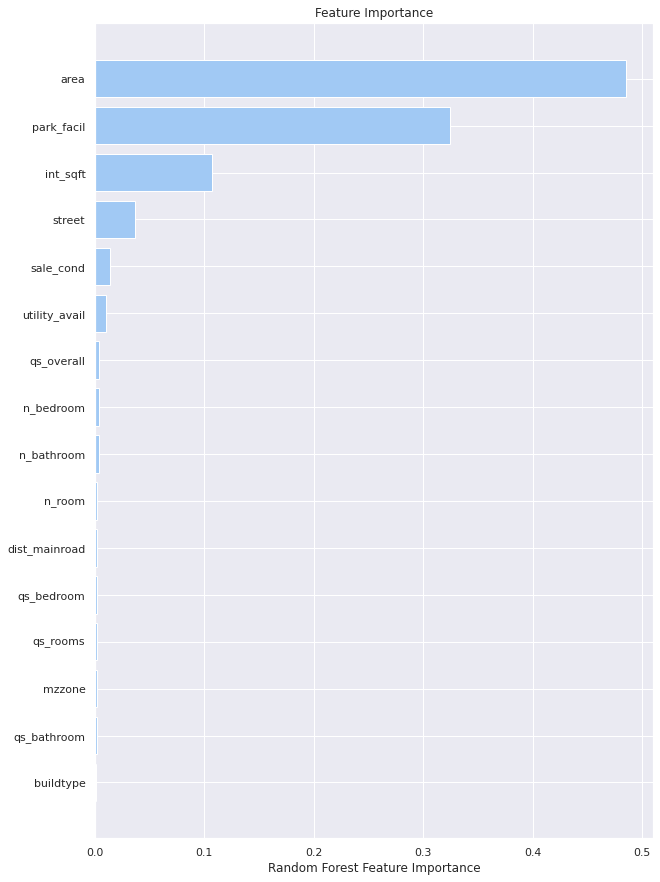

In [ ]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,15))
plt.barh(df.columns[sorted_idx],rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

In [ ]:
xgb_regressor.feature_importances_

array([3.1515318e-01, 4.6797473e-02, 1.8150348e-04, 6.5051869e-02,
       2.9874656e-02, 6.5913973e-03, 5.5718482e-02, 3.3518025e-01,
       3.7401507e-03, 2.2170387e-02, 1.1372722e-01, 1.7302176e-04,
       4.4903861e-04, 5.3183129e-04, 3.9208456e-04, 4.2674909e-03],
      dtype=float32)

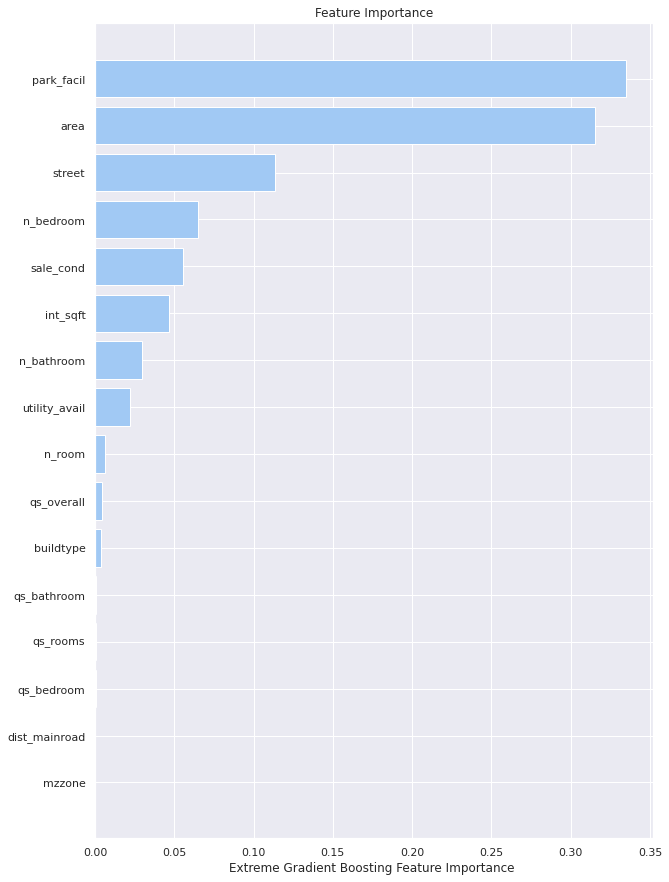

In [ ]:
sorted_idx=xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,15))
plt.barh(df.columns[sorted_idx],xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance ")
plt.title("Feature Importance")
plt.show()

Suggestions:


Based on the feature importance obtained by Best ML model i.e., Extreme Gradient Boosting, sellers should focus on the features of order given below to build homes that fetch more money:

1. Parking Facility.

2. Area.

3. Street.

4. No of Bedrooms.

5. Sqft.

6. No. of Bathrooms.

7. Utility Available.

8. No. of rooms.

9. Building type.

10. Distance from mainroad.

11. MZ Zone.